<a href="https://colab.research.google.com/github/fernandosinaga123456/PRODUCT-SALES-ANALYSIS/blob/main/PRODUCT_SALES_ANALYSIS_Fernando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('sales data.csv')
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print(f"\nKolom: {list(df.columns)}")

Jumlah baris: 8009
Jumlah kolom: 14

Kolom: ['Order_ID', 'Order_Date', 'Customer_Name', 'City', 'State', 'Region', 'Country', 'Category', 'Sub_Category', 'Product_Name', 'Quantity', ' Unit_Price ', ' Revenue ', ' Profit ']


In [5]:
# Konversi Order_Date ke datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Ekstrak informasi waktu
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Month_Name'] = df['Order_Date'].dt.strftime('%B')
df['Quarter'] = df['Order_Date'].dt.quarter
df['Day_of_Week'] = df['Order_Date'].dt.day_name()

In [8]:
print(f"STATISTIK DESKRIPTIF")

df.columns = df.columns.str.strip()
print(df[['Quantity', 'Unit_Price', 'Revenue', 'Profit']].describe())

STATISTIK DESKRIPTIF
          Quantity   Unit_Price      Revenue       Profit
count  8008.000000  8008.000000  8008.000000  8008.000000
mean      1.844406   384.591344   717.664408   157.478511
std       1.073433   276.053174   747.198696   152.014055
min       1.000000    19.780000    20.300000     4.360000
25%       1.000000   165.725000   229.980000    59.362500
50%       1.000000   307.135000   472.065000   110.150000
75%       2.000000   564.820000   887.895000   203.227500
max       8.000000  1372.890000  7110.960000  1760.890000


Visualisasi Kategori

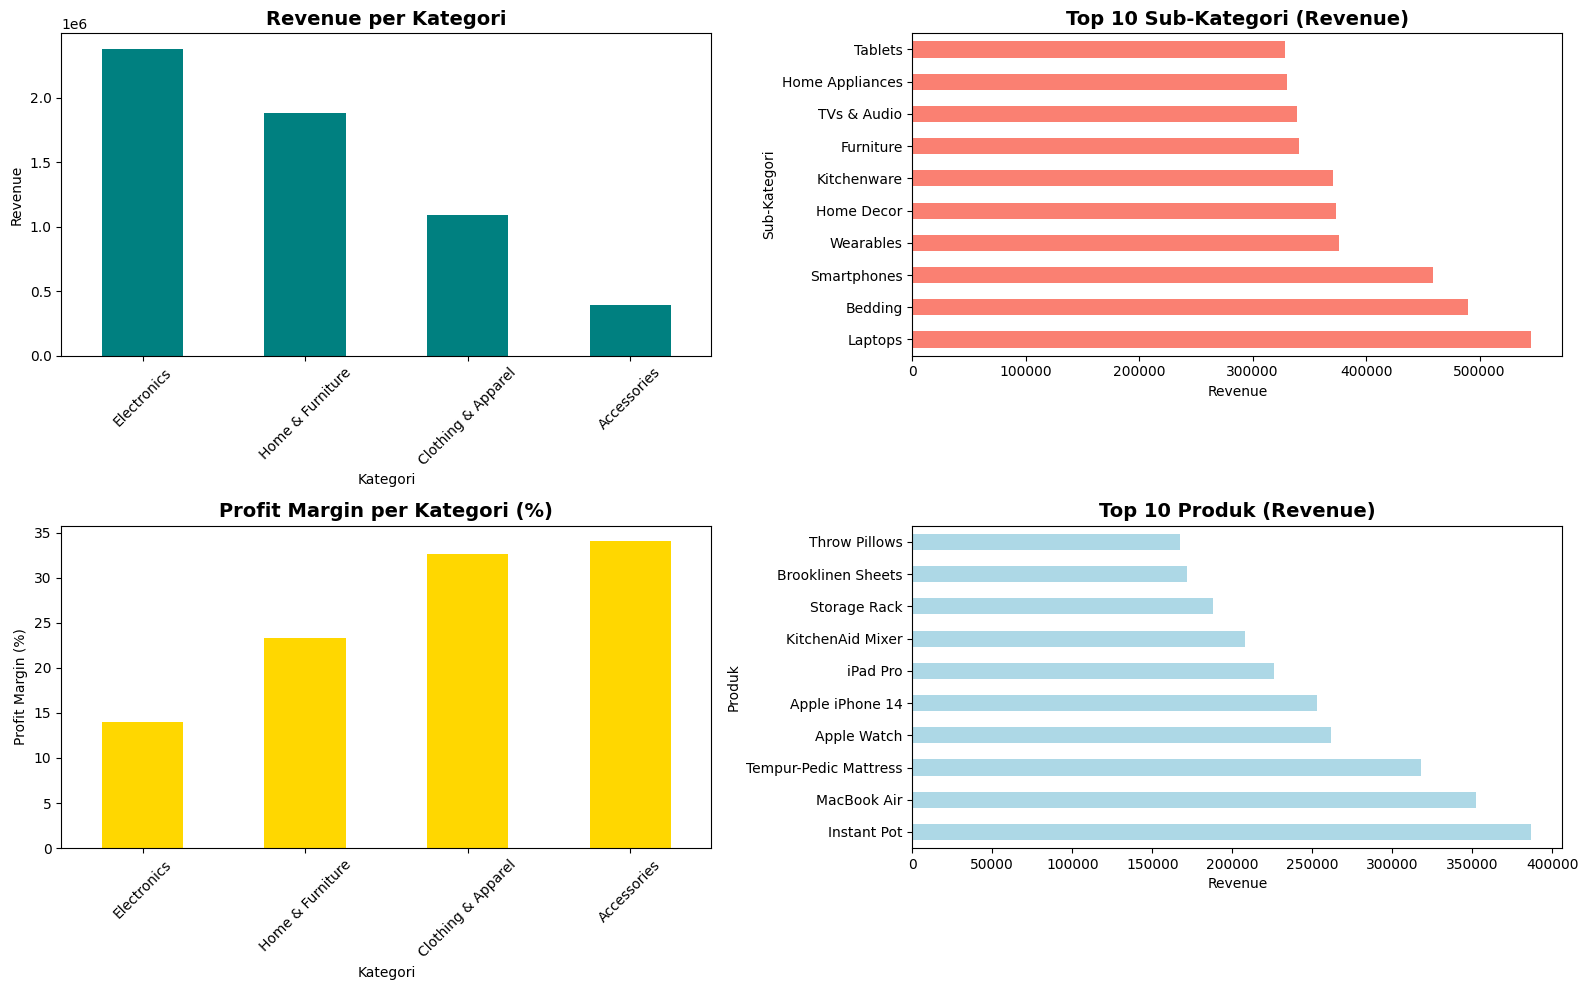

In [11]:
category_sales = df.groupby('Category').agg({
    'Revenue': 'sum',
    'Profit': 'sum'
}).sort_values('Revenue', ascending=False)

subcategory_sales = df.groupby('Sub_Category').agg({
    'Revenue': 'sum'
}).sort_values('Revenue', ascending=False)

product_sales = df.groupby('Product_Name').agg({
    'Revenue': 'sum'
}).sort_values('Revenue', ascending=False)


# Visualisasi kategori
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Revenue per kategori
category_sales['Revenue'].plot(kind='bar', ax=axes[0,0], color='teal')
axes[0,0].set_title('Revenue per Kategori', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Kategori')
axes[0,0].set_ylabel('Revenue')
axes[0,0].tick_params(axis='x', rotation=45)

# Top 10 sub-kategori
subcategory_sales['Revenue'].head(10).plot(kind='barh', ax=axes[0,1], color='salmon')
axes[0,1].set_title('Top 10 Sub-Kategori (Revenue)', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Revenue')
axes[0,1].set_ylabel('Sub-Kategori')

# Profit margin per kategori
category_sales['Profit_Margin'] = (category_sales['Profit'] / category_sales['Revenue'] * 100)
category_sales['Profit_Margin'].plot(kind='bar', ax=axes[1,0], color='gold')
axes[1,0].set_title('Profit Margin per Kategori (%)', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Kategori')
axes[1,0].set_ylabel('Profit Margin (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# Top 10 produk
product_sales['Revenue'].head(10).plot(kind='barh', ax=axes[1,1], color='lightblue')
axes[1,1].set_title('Top 10 Produk (Revenue)', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Revenue')
axes[1,1].set_ylabel('Produk')

plt.tight_layout()
plt.savefig('category_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

Analisis Wilayah


Performa per Region:
           Revenue     Profit  Order_ID
Region                                 
East    1888250.48  381021.51      2362
West    1414092.94  323876.22      2157
Centre  1410368.66  317246.04      1983
South   1034344.50  238944.15      1506

Top 10 State:
                 Revenue    Profit
State                             
Arizona        285114.07  62427.70
California     281999.12  65321.64
New Hampshire  205219.56  40133.14
Vermont        204409.19  40787.47
Massachusetts  194617.65  38081.11
Connecticut    193510.31  39482.79
Pennsylvania   193322.17  36951.12
Delaware       186157.91  39771.36
New Jersey     181673.84  37812.59
New York       166639.29  32474.73


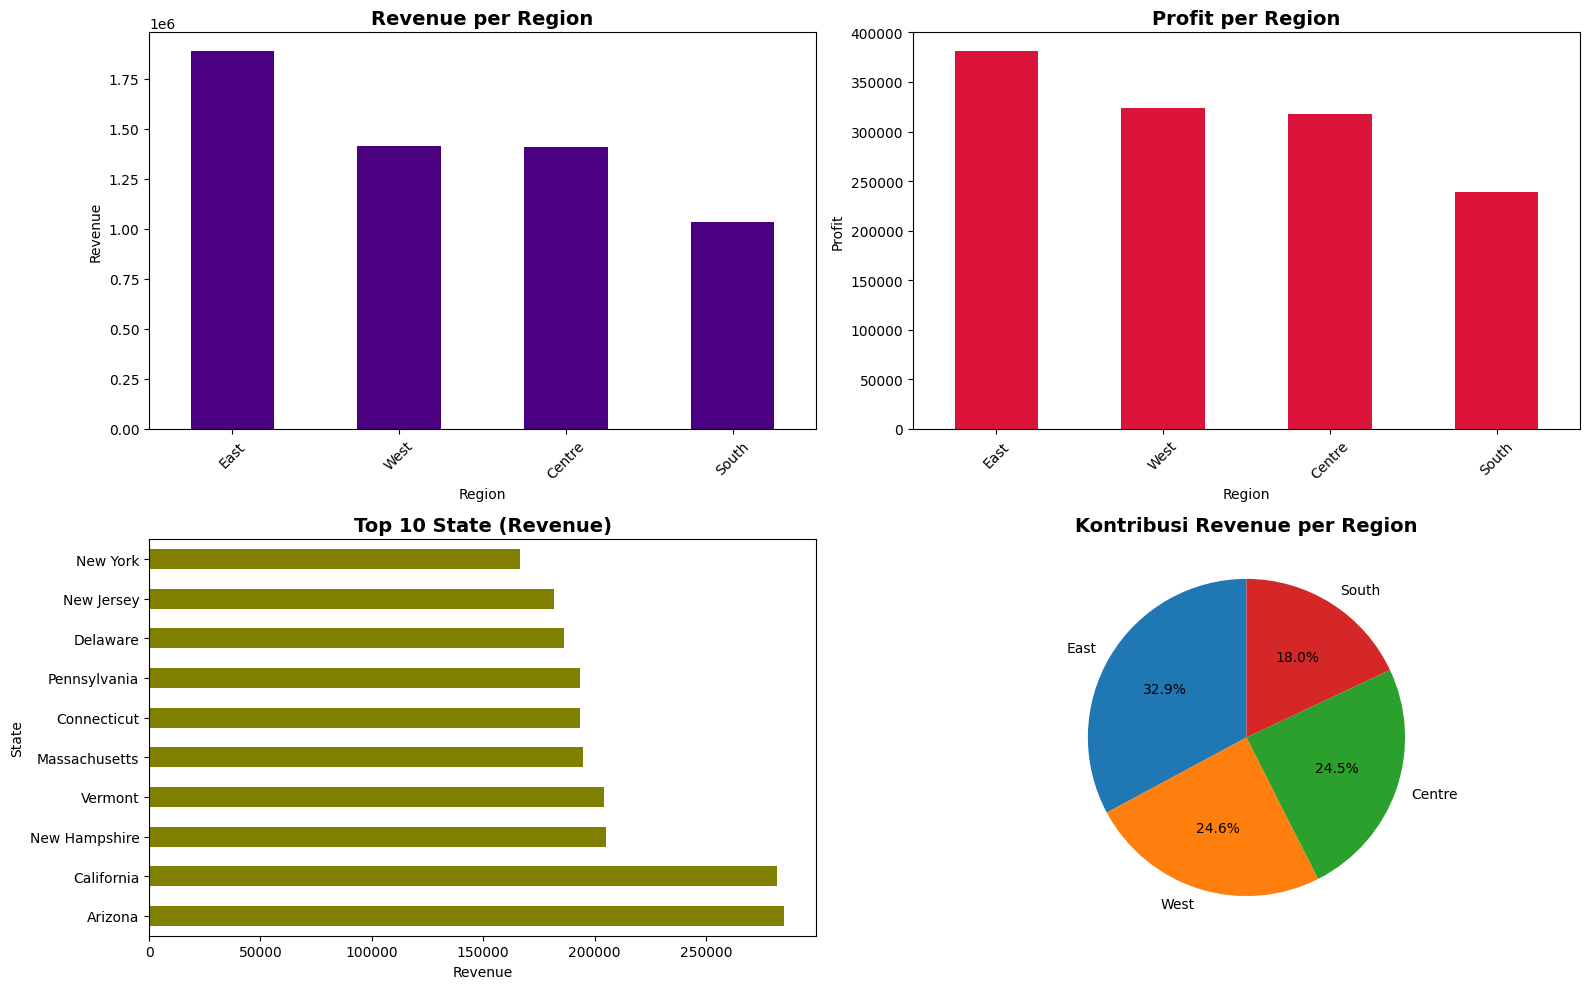

In [13]:
# Performa per region
region_sales = df.groupby('Region').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Order_ID': 'count'
}).sort_values('Revenue', ascending=False)
print("\nPerforma per Region:")
print(region_sales)

# Performa per state
state_sales = df.groupby('State').agg({
    'Revenue': 'sum',
    'Profit': 'sum'
}).sort_values('Revenue', ascending=False).head(10)
print("\nTop 10 State:")
print(state_sales)

# Visualisasi wilayah
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Revenue per region
region_sales['Revenue'].plot(kind='bar', ax=axes[0,0], color='indigo')
axes[0,0].set_title('Revenue per Region', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Region')
axes[0,0].set_ylabel('Revenue')
axes[0,0].tick_params(axis='x', rotation=45)

# Profit per region
region_sales['Profit'].plot(kind='bar', ax=axes[0,1], color='crimson')
axes[0,1].set_title('Profit per Region', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Region')
axes[0,1].set_ylabel('Profit')
axes[0,1].tick_params(axis='x', rotation=45)

# Top 10 states
state_sales['Revenue'].plot(kind='barh', ax=axes[1,0], color='olive')
axes[1,0].set_title('Top 10 State (Revenue)', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Revenue')
axes[1,0].set_ylabel('State')

# Pie chart - kontribusi region
region_sales['Revenue'].plot(kind='pie', ax=axes[1,1], autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Kontribusi Revenue per Region', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('')

plt.tight_layout()
plt.savefig('region_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

Analisis Pelanggan


Total Pelanggan: 7609

Top 10 Pelanggan (by Revenue):
                    Total_Orders  Revenue   Profit  Avg_Order_Value
Customer_Name                                                      
Christopher Jones              2  8128.76  1441.69          4064.38
Toni Gentry                    1  7110.96  1402.02          7110.96
Robert Henry                   1  7082.95  1169.59          7082.95
Roy Spears                     1  6918.78   696.36          6918.78
Matthew Williamson             2  6721.26   894.98          3360.63
Krystal Thomas                 1  6286.85   762.79          6286.85
Luis Miller                    2  6069.60   740.58          3034.80
Terri Alexander                1  5897.08  1760.89          5897.08
Laura Stephens                 1  5800.38   571.21          5800.38
Laura Cowan                    1  5757.78  1502.92          5757.78

Segmentasi Pelanggan:
            Revenue              Total_Orders
                sum         mean          sum
Segment       

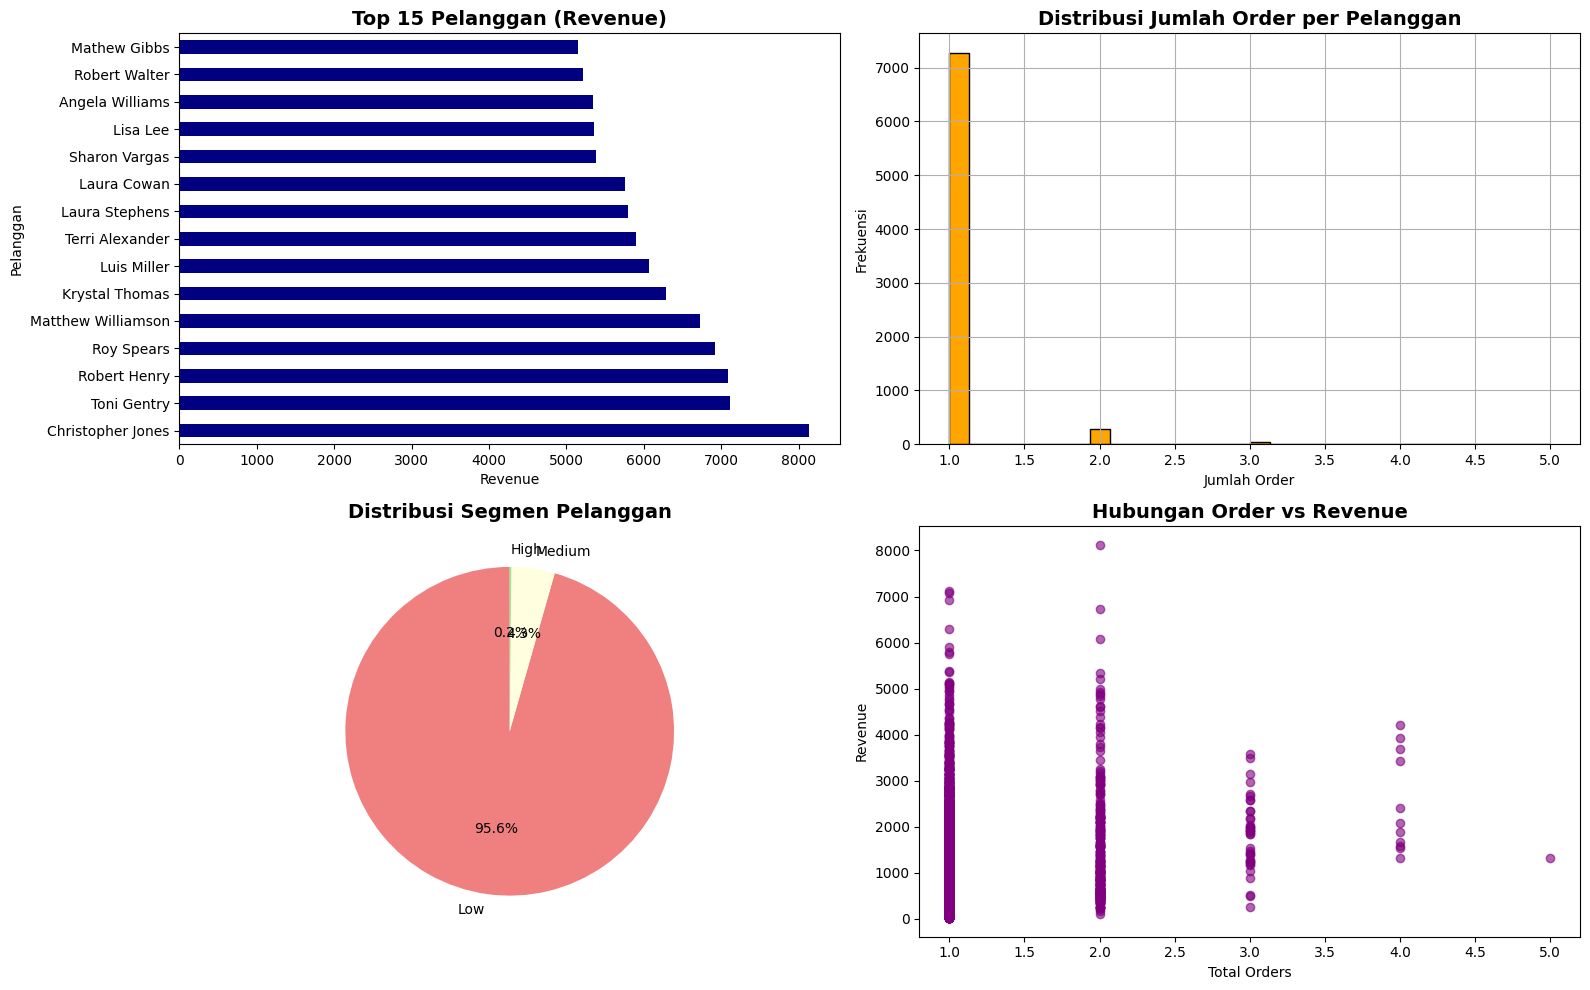

In [14]:
# Analisis per pelanggan
customer_analysis = df.groupby('Customer_Name').agg({
    'Order_ID': 'count',
    'Revenue': 'sum',
    'Profit': 'sum'
}).rename(columns={'Order_ID': 'Total_Orders'})

customer_analysis['Avg_Order_Value'] = customer_analysis['Revenue'] / customer_analysis['Total_Orders']
customer_analysis = customer_analysis.sort_values('Revenue', ascending=False)

print(f"\nTotal Pelanggan: {customer_analysis.shape[0]}")
print(f"\nTop 10 Pelanggan (by Revenue):")
print(customer_analysis.head(10))

# Segmentasi pelanggan berdasarkan frekuensi pembelian
customer_analysis['Segment'] = pd.cut(customer_analysis['Total_Orders'],
                                        bins=[0, 1, 3, 100],
                                        labels=['Low', 'Medium', 'High'])

segment_stats = customer_analysis.groupby('Segment').agg({
    'Revenue': ['sum', 'mean'],
    'Total_Orders': 'sum'
})
print(f"\nSegmentasi Pelanggan:")
print(segment_stats)

# Visualisasi pelanggan
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Top 15 pelanggan
customer_analysis['Revenue'].head(15).plot(kind='barh', ax=axes[0,0], color='navy')
axes[0,0].set_title('Top 15 Pelanggan (Revenue)', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Revenue')
axes[0,0].set_ylabel('Pelanggan')

# Distribusi jumlah order per pelanggan
customer_analysis['Total_Orders'].hist(bins=30, ax=axes[0,1], color='orange', edgecolor='black')
axes[0,1].set_title('Distribusi Jumlah Order per Pelanggan', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Jumlah Order')
axes[0,1].set_ylabel('Frekuensi')

# Segmentasi pelanggan
segment_counts = customer_analysis['Segment'].value_counts()
segment_counts.plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightyellow', 'lightgreen'])
axes[1,0].set_title('Distribusi Segmen Pelanggan', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('')

# Scatter: Total Orders vs Revenue
axes[1,1].scatter(customer_analysis['Total_Orders'], customer_analysis['Revenue'], alpha=0.6, color='purple')
axes[1,1].set_title('Hubungan Order vs Revenue', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Total Orders')
axes[1,1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('customer_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


Analisis Temporal - Pola Musiman


Penjualan Bulanan:
    Year Month_Name    Revenue     Profit  Order_ID
4   2023    January  162422.80   34587.30       203
3   2023   February  101899.36   24002.08       155
7   2023      March  155825.64   33831.12       223
0   2023      April  146933.87   32364.41       219
8   2023        May  195101.65   41164.20       269
6   2023       June  179694.23   39697.72       266
5   2023       July  171535.33   39274.40       240
1   2023     August  185183.24   39021.34       264
11  2023  September  172764.03   41776.98       269
10  2023    October  333619.48   69363.04       461
9   2023   November  541793.11  119384.07       809
2   2023   December  384921.92   84364.64       537
16  2024    January  183326.30   38714.77       242
15  2024   February  129921.19   27682.51       161
19  2024      March  193078.55   42676.42       231
12  2024      April  190815.90   42117.74       262
20  2024        May  183446.52   41511.83       289
18  2024       June  204066.94   47785.16   

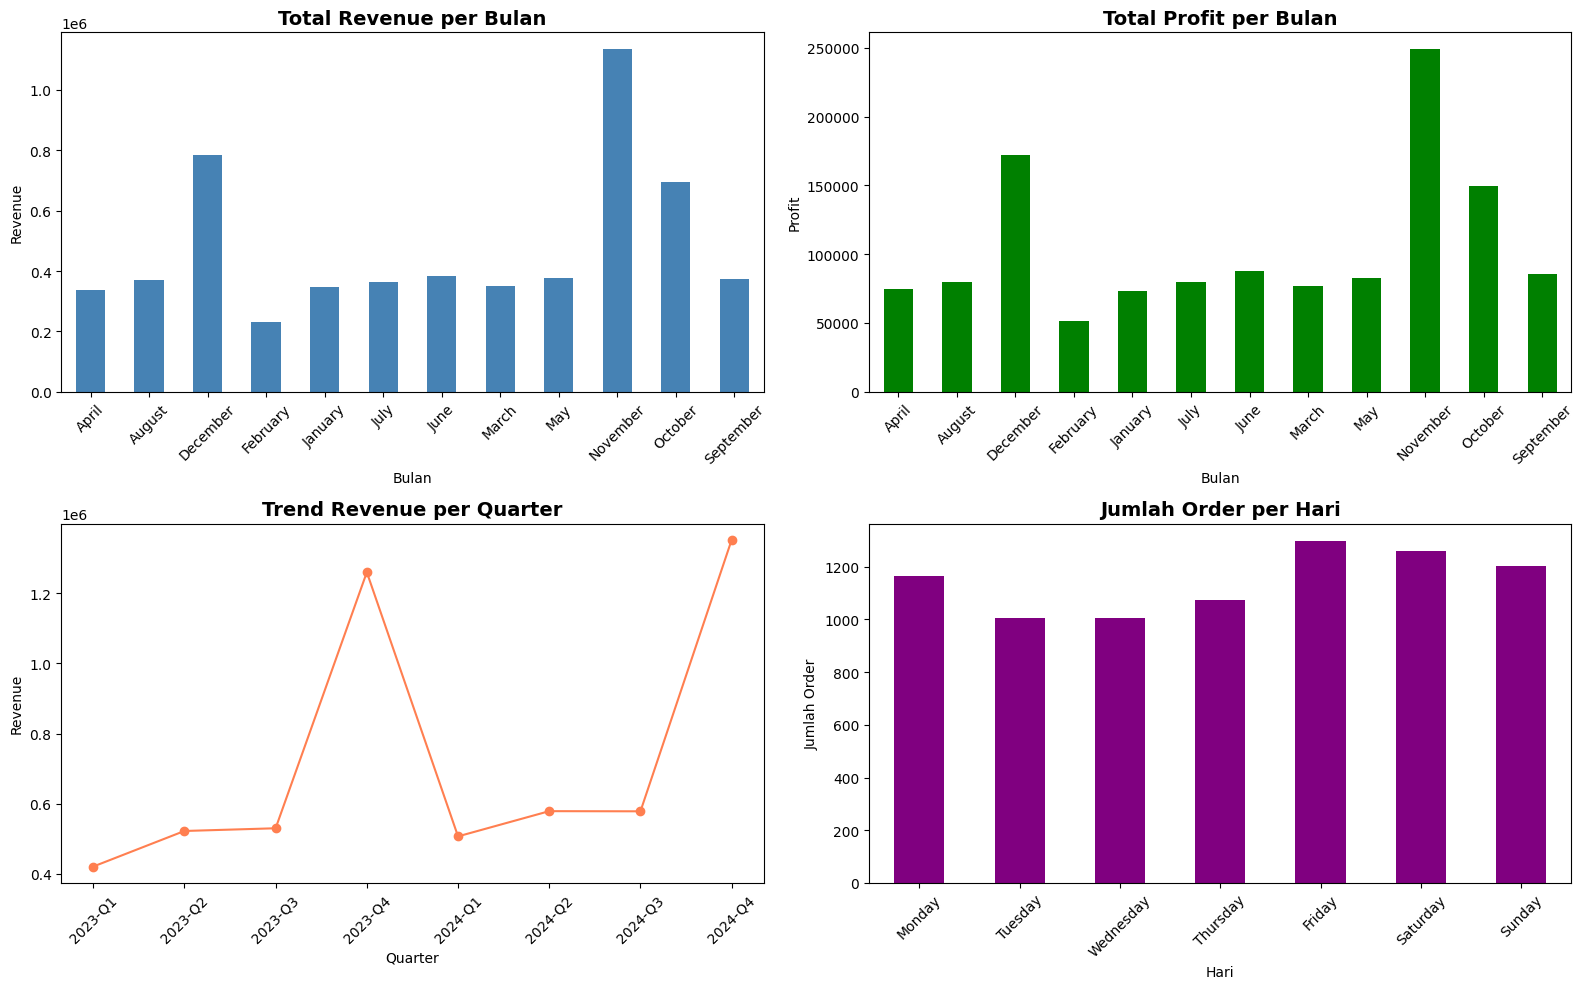

In [16]:
# Penjualan per bulan
monthly_sales = df.groupby(['Year', 'Month_Name', 'Month']).agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Order_ID': 'count'
}).reset_index()
monthly_sales = monthly_sales.sort_values(['Year', 'Month'])

print("\nPenjualan Bulanan:")
print(monthly_sales[['Year', 'Month_Name', 'Revenue', 'Profit', 'Order_ID']])

# Visualisasi trend bulanan
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Revenue per bulan
monthly_sales.groupby('Month_Name')['Revenue'].sum().plot(kind='bar', ax=axes[0,0], color='steelblue')
axes[0,0].set_title('Total Revenue per Bulan', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Bulan')
axes[0,0].set_ylabel('Revenue')
axes[0,0].tick_params(axis='x', rotation=45)

# Profit per bulan
monthly_sales.groupby('Month_Name')['Profit'].sum().plot(kind='bar', ax=axes[0,1], color='green')
axes[0,1].set_title('Total Profit per Bulan', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Bulan')
axes[0,1].set_ylabel('Profit')
axes[0,1].tick_params(axis='x', rotation=45)

# Trend per quarter
quarterly_sales = df.groupby(['Year', 'Quarter']).agg({
    'Revenue': 'sum'
}).reset_index()
quarterly_sales['Period'] = quarterly_sales['Year'].astype(str) + '-Q' + quarterly_sales['Quarter'].astype(str)
quarterly_sales.plot(x='Period', y='Revenue', kind='line', marker='o', ax=axes[1,0], color='coral', legend=False)
axes[1,0].set_title('Trend Revenue per Quarter', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Quarter')
axes[1,0].set_ylabel('Revenue')
axes[1,0].tick_params(axis='x', rotation=45)

# Jumlah order per hari dalam seminggu
day_order = df['Day_of_Week'].value_counts()
day_order = day_order.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_order.plot(kind='bar', ax=axes[1,1], color='purple')
axes[1,1].set_title('Jumlah Order per Hari', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Hari')
axes[1,1].set_ylabel('Jumlah Order')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('temporal_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
